# pandas 可视化(绘图)

In [2]:
import pandas as pd  # 导入pandas模块
import numpy as np
# python里面的绘图库
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #显示中文不乱码
plt.rcParams['axes.unicode_minus'] = False  #  显示负号

# 读取 HR.csv 形成 DataFrame
hr_data = pd.read_csv('data/HR.csv', encoding='GBK')

In [3]:
hr_data.head(2)

,员工满意度,考核评分,项目数量,每月在公司工作时间,司龄,工作事故,是否离职,五年内是否升职,部门,薪水
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


## 折线图

In [9]:
# 310/22

<Axes: xlabel='每月在公司工作时间'>

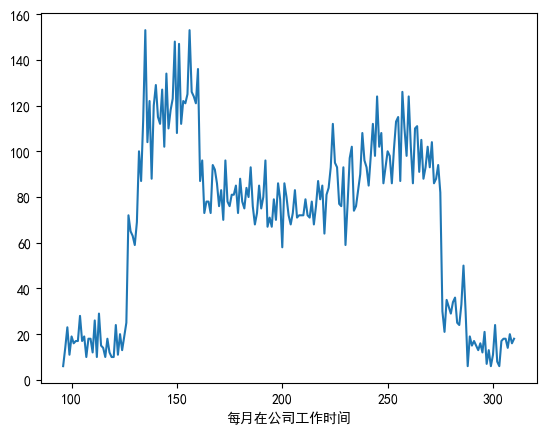

In [18]:
# 折线图：绘制每月在公司工作时间 和 人数的分布
# 绘图x轴:数据的index
# 绘图y轴:数据的values
s1=hr_data.每月在公司工作时间.value_counts().sort_index(axis=0,
                                           ascending=True)
s1
s1.plot(kind='line')

<Axes: ylabel='count'>

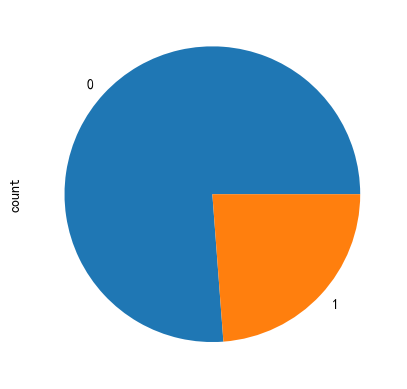

In [26]:
hr_data['是否离职'].value_counts().plot(kind='pie')

## 柱状图

In [27]:
# 柱状图：分析公司员工离职和非离职的人数的柱状图

left_val_cnt = hr_data['是否离职'].value_counts()
left_val_cnt

是否离职
0    11428
1     3571
Name: count, dtype: int64

<Axes: xlabel='是否离职'>

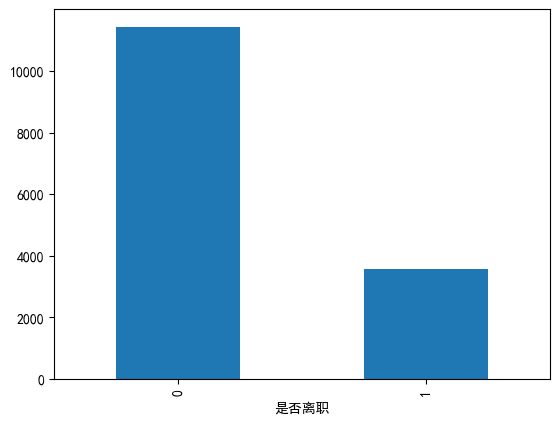

In [28]:
# 使用 Series 的plot方法绘图

left_val_cnt.plot(kind="bar")

<Axes: >

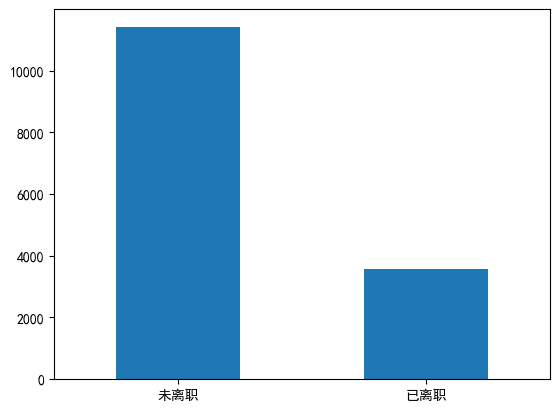

In [31]:
# 使用Series 的plot  绘图时，Series的标签索引会变为x 轴的标签

left_val_cnt.index = ['未离职', '已离职']
left_val_cnt.plot.bar(
    rot=0  # x 轴标签的旋转角度
)
left_val_cnt.plot(kind='bar',
    rot=0  # x 轴标签的旋转角度
)

In [32]:
# 计算公司员工司龄的分布情况

left_years_cnt = hr_data.司龄.value_counts().sort_index()
left_years_cnt

司龄
2     3244
3     6443
4     2557
5     1473
6      718
7      188
8      162
10     214
Name: count, dtype: int64

## 条形图

<Axes: ylabel='司龄'>

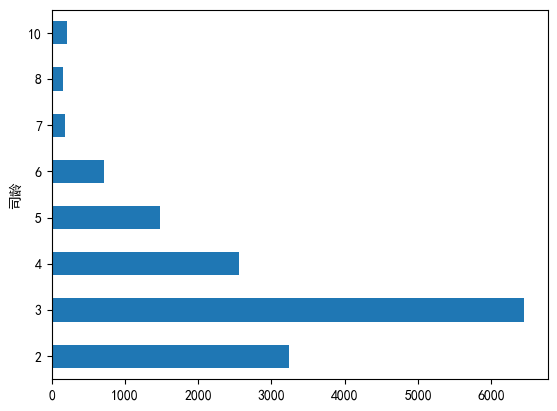

In [33]:
# 条形图：分析公司员工司龄的分布情况
left_years_cnt.plot(kind='barh')

In [35]:
# 计算项目数量对应的频数。

project_cnt = hr_data.项目数量.value_counts()
project_cnt

项目数量
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: count, dtype: int64

1. 连续数值型数据: 员工满意度  绩效评分  工作时长 直方图 箱线图 
2. 离散类别性数据: 分组统计 项目数量 司龄 工作事故  是否离职,五年内是否升职,部门,薪水  柱形图 条形图 饼图

In [41]:
hr_data.columns

Index(['员工满意度', '考核评分', '项目数量', '每月在公司工作时间', '司龄', '工作事故', '是否离职', '五年内是否升职',
       '部门', '薪水'],
      dtype='object')

In [46]:
hr_data['司龄'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

## 饼图

<Axes: ylabel='count'>

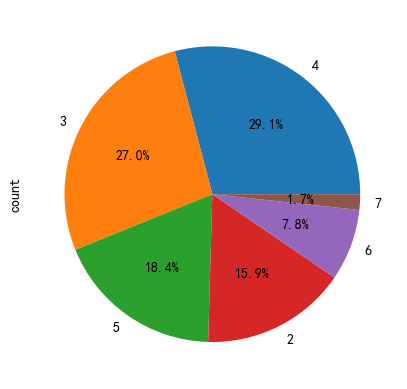

In [38]:
# 饼图：绘制项目数量的占比情况
project_cnt.plot.pie(autopct="%.1f%%")

## 散点图

<Axes: xlabel='每月在公司工作时间', ylabel='考核评分'>

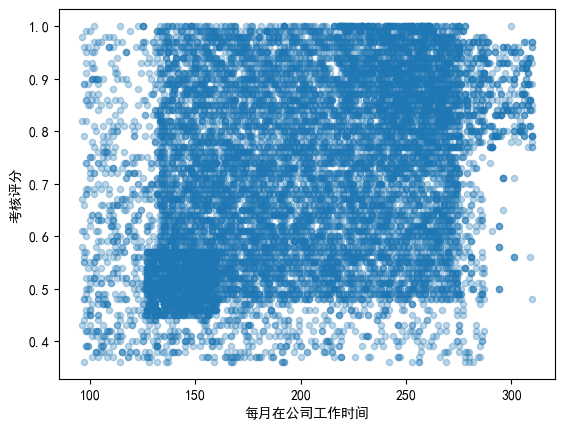

In [52]:
# 散点图：绘图显示 员工满意度 和考核评分 的分布
# 两个数值型数据 相关分析
hr_data.plot(
    kind='scatter',
    x='每月在公司工作时间',  # x轴数据
    y='考核评分',    # y 轴数据
    alpha=0.3  # 透明度
)

In [53]:
# 取出所有在职员工的数据，用变量 left_0 绑定此数据表
left_0 = hr_data[ hr_data.是否离职 == 0 ]
# 取出所有离职员工的数据，用变量 left_1 绑定此数据表
left_1 = hr_data[ hr_data.是否离职 == 1 ]

<Axes: xlabel='员工满意度', ylabel='考核评分'>

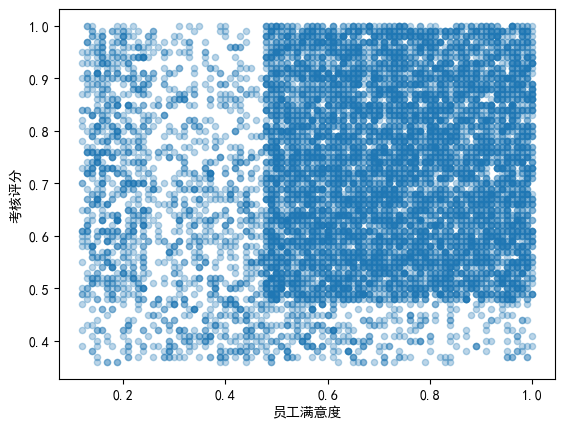

In [54]:
# 绘制在职员工的 "员工满意度"和 "考核评分"的分布

left_0.plot(
    kind='scatter',
    x='员工满意度',  # x轴数据
    y='考核评分',    # y 轴数据
    alpha=0.3  # 透明度
)

<Axes: xlabel='员工满意度', ylabel='考核评分'>

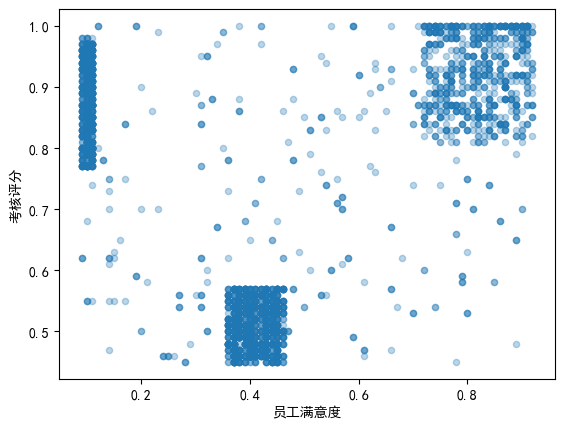

In [55]:
# 绘制离职员工的 "员工满意度"和 "考核评分"的分布

left_1.plot(
    kind='scatter',
    x='员工满意度',  # x轴数据
    y='考核评分',    # y 轴数据
    alpha=0.3  # 透明度
)

## 直方图

<Axes: ylabel='Frequency'>

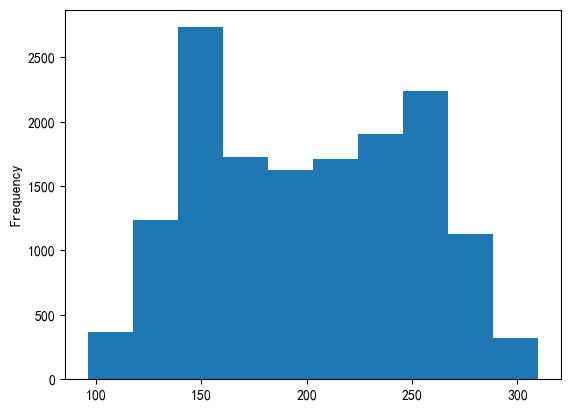

In [59]:
# 直方图：绘制每月在公司工作时间 和 人数的直方图
# 将连续的数值型数据,划分为不同的等宽区间,再统计不同区间人数
# bins设置划分为几个柱子
hr_data.每月在公司工作时间.plot.hist(bins=10)

## 箱线图

<Axes: >

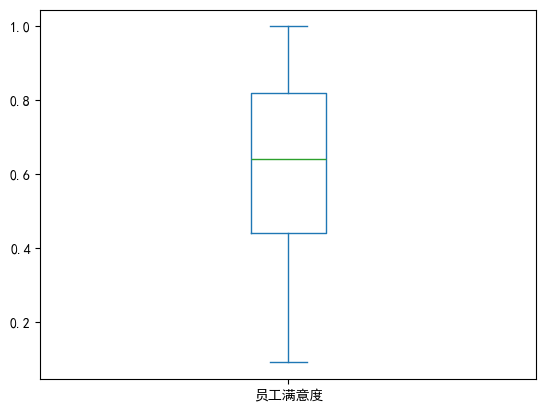

In [60]:
# 箱线图：绘制员工满意度的数据分布情况
hr_data.员工满意度.plot.box()

In [ ]:
# kind : str
#     - 'line' : line plot (default)
#     - 'bar' : vertical bar plot
#     - 'barh' : horizontal bar plot
#     - 'hist' : histogram
#     - 'box' : boxplot
#     - 'pie' : pie plot
#     - 'scatter' : scatter plot (DataFrame only)